In [20]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd

In [21]:
cifar10_data = tf.keras.datasets.cifar10.load_data()

In [22]:
# https://www.cs.toronto.edu/~kriz/cifar.html
CATEGORII_IMAGINI = ['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [23]:
((x_train, y_train),(x_test, y_test)) =  cifar10_data

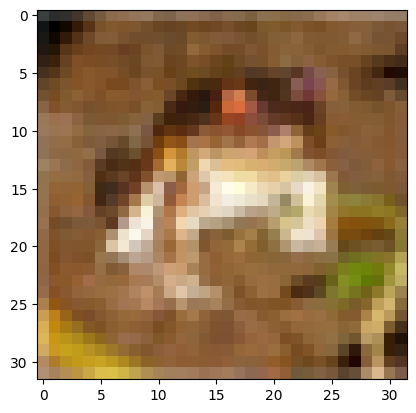

In [24]:
plt.imshow(x_train[0])

In [25]:
CATEGORII_IMAGINI[int(y_train[0])]

/tmp/ipython-input-2933032449.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  CATEGORII_IMAGINI[int(y_train[0])]


'frog'

In [26]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [27]:
data_augumentation_layer = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.RandomTranslation(0.2, 0.2),
])

In [28]:
data_augumentation_layer.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_1 (RandomFlip)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_1               │ ?                      │   0 (unbuilt) │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_1 (RandomZoom)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_contrast_1               │ ?                      │   0 (unbuilt) │
│ (RandomContrast)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_translation_1            │ ?                      │   0 (unbuilt) │
│ (RandomTranslation)             │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
x_train[0].shape

(32, 32, 3)

In [30]:
augmented_cnn_model = tf.keras.Sequential(
    [
      ## INPUT
       tf.keras.layers.Input(shape=(32, 32, 3)),
         tf.keras.layers.Rescaling(1./255),


        ## Data augumentation - pt a avea mai multe date, create artificial cu ajutorul memorie
        data_augumentation_layer,

        ## CNN
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        ## Fully connected
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),

        tf.keras.layers.Dropout(0.2), # 20% din neuroni sunt dezactivati random

        tf.keras.layers.Dense(64, activation='relu'),





      ###
    ]
)

augmented_cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
history_augumented_cnn = augmented_cnn_model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 71s 55ms/step - accuracy: 0.1489 - loss: 2.6810 - val_accuracy: 0.1088 - val_loss: 2.2950
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 65s 52ms/step - accuracy: 0.1654 - loss: 2.2640 - val_accuracy: 0.2416 - val_loss: 2.0624
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 64s 51ms/step - accuracy: 0.2026 - loss: 2.1873 - val_accuracy: 0.1032 - val_loss: 2.3026
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 66s 53ms/step - accuracy: 0.1058 - loss: 2.3025 - val_accuracy: 0.1124 - val_loss: 2.3026
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 64s 51ms/step - accuracy: 0.1093 - loss: 2.3026 - val_accuracy: 0.0987 - val_loss: 2.3026
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 53ms/step - accuracy: 0.1103 - loss: 2.3026 - val_accuracy: 0.0981 - val_loss: 2.3026
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 65s 52ms/step - accuracy: 0.1041 - loss: 2.3028 - val_accuracy: 0.1443 - val_loss: 2.3026
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 53ms/step - accuracy: 0.1095 -